In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


![](http://www.hakaimagazine.com/wp-content/uploads/header-titanic-solar-storms.jpg)

# Titanic  
Problem - Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Question to answer- What sorts of people were more likely to survive? 

### 1. Importing libraries 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline

### 2. Loading Dataset

We are provided with train and test data csv files. 

Dividing the dataset into train and test set helps in training our model on "train" dataset and testing out model or predicting out "target" variable on "test" dataset. By doing this, we are trying to test our model on unseen or unbiased data which helps in avoiding overfitting.

In [3]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

print("Training dataset contains: "+str(train_data.shape)+ " rows and columns")
print("Testing dataset contains: "+str(test_data.shape)+ " rows and columns")

Training dataset contains: (891, 12) rows and columns
Testing dataset contains: (418, 11) rows and columns


In [4]:
#Let's look at first 5 rows of the training dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. EDA

In [5]:
#Look at the name of the 12 columns
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Provided information about columns
* Survived: Survival (0 = No; 1 = Yes)
* Pclass  : Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* Name    : Name
* Sex     : Sex
* Age     : Age
* Sibsp   : Number of Siblings/Spouses Aboard
* Parch   : Number of Parents/Children Aboard
* Ticket  : Ticket Number
* Fare    : Passenger Fare
* Cabin   : Cabin Number
* Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [6]:
train_data.info()
print('-'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

* Here we have 5 object data type variables i.e. Categorical (Name, Sex, Ticket, Cabin, Embarked)
    and the rest are Numerical

In [7]:
#Looking at the null values in the train dataset
train_data.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<AxesSubplot:>

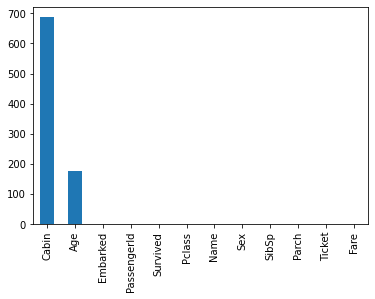

In [8]:
#This bar graph is not solving any purpose it's just for the visual 
train_data.isnull().sum().sort_values(ascending=False).plot(kind='bar')

In [9]:
#Looking at the null values in the test dataset
test_data.isnull().sum().sort_values(ascending= False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<AxesSubplot:>

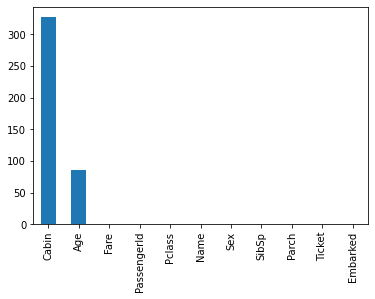

In [10]:
test_data.isnull().sum().sort_values(ascending= False).plot(kind='bar')

What sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

#### UNIVARIATE ANALYSIS 
##### It is the simplest form of statistical analysis. Uni means "One" so that means analyzing each variable in the data. In univariate analysis we are not looking at cause or relationship between variables

Let's start looking at variables one by one starting with Survived (target variable)

In [11]:
#how many out of total(train) survived on titanic
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
#categorical variable
#how many women survived on the titanic
train_data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

* 74% women out of total survived were women

In [13]:
#PCLASS - 1ST, 2ND,3RD
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
train_data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

* 25% of people from third class survived the titanic compared to 63% for first class

In [15]:
#EMBARKED
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
train_data.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [17]:
#SibSp- Number of siblings
train_data.groupby('SibSp')['Survived'].mean().sort_values(ascending=False)

SibSp
1    0.535885
2    0.464286
0    0.345395
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [18]:
#Parch- Number of parents/childer aboard
train_data.groupby('Parch')['Survived'].mean().sort_values(ascending=False)

Parch
3    0.600000
1    0.550847
2    0.500000
0    0.343658
5    0.200000
4    0.000000
6    0.000000
Name: Survived, dtype: float64

### Data Visualization
#### Categorical features

These are the visual representation of all the above variables. It makes it easy to view in one place

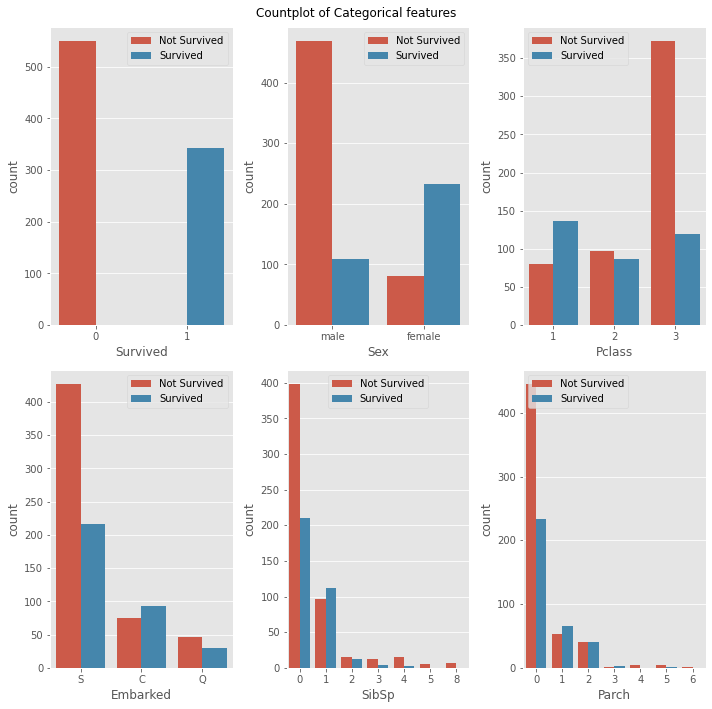

In [19]:
#let's create countplot for all the categorical features 
countplot_features = ['Survived','Sex','Pclass','Embarked','SibSp','Parch']
countlist = list(enumerate(countplot_features)) #enumerate map the iteration value with each variable in list

plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.suptitle('Countplot of Categorical features') #main title

for i in countlist:
    plt.subplot(2,3,i[0]+1) #2 means 2 rows and 3 means 3 columns and i[0]+1 the position of plot where i[0] means return 1st element of enumerate i.e. iterable 0,1,2,3,..
    sns.countplot(data = train_data , x=i[1],hue = 'Survived')
    plt.legend(['Not Survived','Survived'])
    
plt.tight_layout()
plt.show()
    

#### Numerical Features

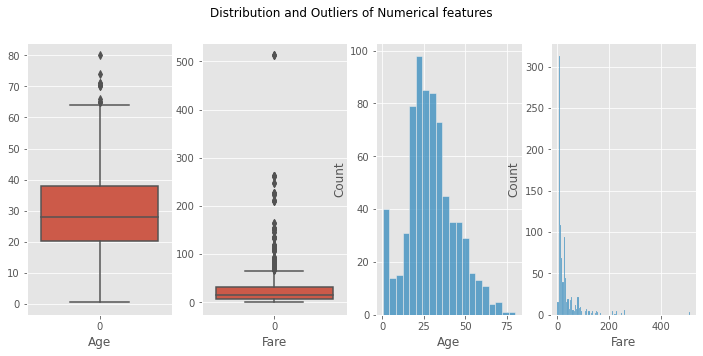

In [20]:
#look at the distribution of numerical variables i.e. Age and Fare

num_features = ['Age','Fare']
num_list = list(enumerate(num_features))

plt.figure(figsize = (12,5))
plt.suptitle('Distribution and Outliers of Numerical features')

for i in num_list:
    plt.subplot(1,4,i[0]+1)
    sns.boxplot(data=train_data[i[1]])
    plt.xlabel(str(i[1]))
    
for i in num_list:
    plt.subplot(1,4,i[0]+3)
    sns.histplot(data = train_data[i[1]])
    plt.xlabel(str(i[1]))
    
plt.show()

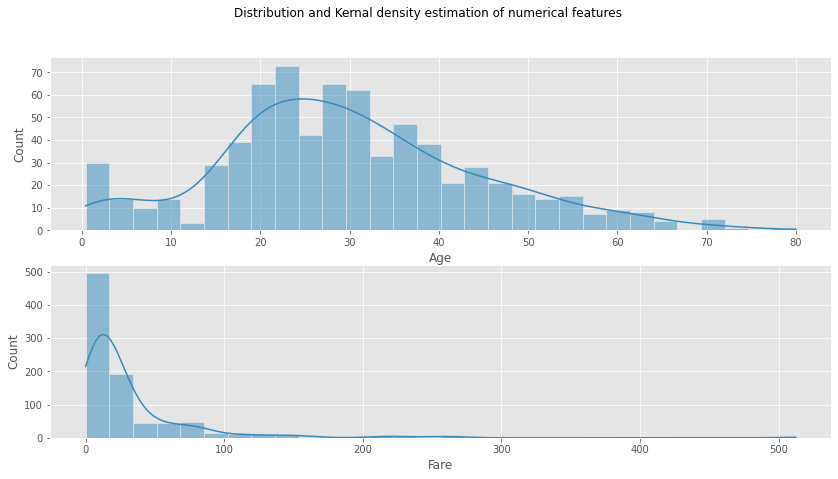

In [21]:
plt.figure(figsize=(14,7))
plt.suptitle('Distribution and Kernal density estimation of numerical features')

for i in num_list:
    plt.subplot(2,1,i[0]+1)
    sns.histplot(data=train_data[i[1]],kde=True,bins=30)
    plt.xlabel(str(i[1]))
    
plt.show()

### Bivariate and Multivariate analysis

As we have all the information about the independent variables, let's try to analyze the relationship between these independent variables and how they are correlated


<AxesSubplot:title={'center':'Correlation of independent variable with dependent variable (Survived)'}>

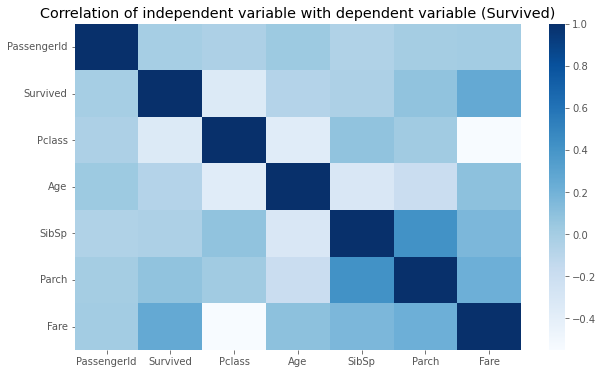

In [22]:
plt.figure(figsize=(10,6))
plt.title('Correlation of independent variable with dependent variable (Survived)')

corr=train_data.corr()
sns.heatmap(corr,cmap='Blues')

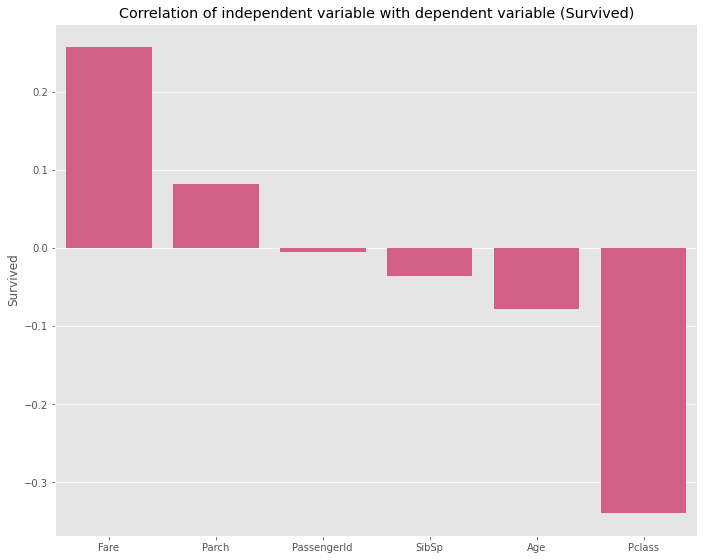

In [23]:
plt.figure(figsize=(10,8))
plt.title('Correlation of independent variable with dependent variable (Survived)')

plt.style.use('fivethirtyeight')
corr1 = train_data.corr()['Survived'].sort_values(ascending=False)[1:]
sns.barplot(x=corr1.index,y = corr1, color=(0.90,0.30,0.50))
plt.tight_layout()
plt.show()

Looking at the above image, it can be observed that:
1. People had a higher chance of survival if they had a higher fair 

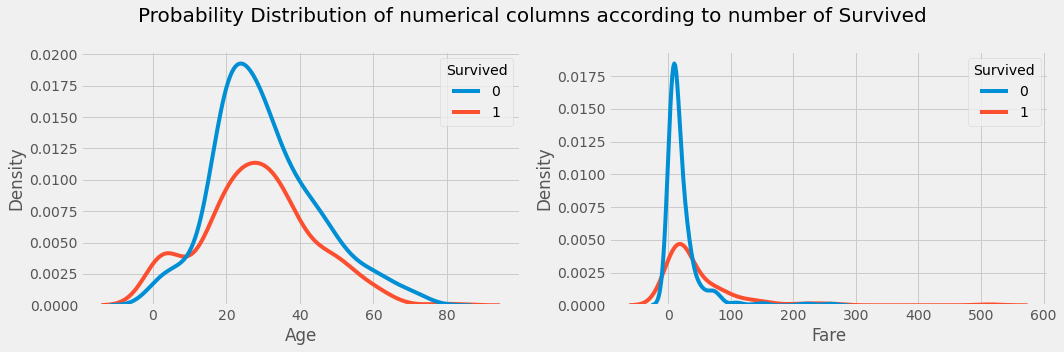

In [24]:
plt.figure(figsize=(15,5))
plt.suptitle("Probability Distribution of numerical columns according to number of Survived", fontsize = 20)
for i in num_list:
    plt.subplot(1,2,i[0]+1)
    sns.kdeplot(data=train_data, x=i[1], hue="Survived")
plt.tight_layout()
plt.show()

## Feature Engineering and Model Building
I am still learning how to build models and I will cover this topic in the next notebook. Stay tuned. 

Thank You 😊 